In [799]:
import numpy as np
import pickle
import math
from scipy.stats import sem
import matplotlib.pyplot as plt
import pandas as pd
import time
import pprint
import seaborn as sns
import statsmodels.formula.api as smf
import CMR_IA as cmr
import scipy as sp
from matplotlib.lines import Line2D
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 16

In [800]:
with open("simu3_data/simu3_design.pkl", 'rb') as inp:
    df = pickle.load(inp)
# df = df.loc[df.session < 300]
df

,position,session,testidx,lag,type,study_itemno1,study_itemno2,test_itemno1,test_itemno2
0,0,0,147,0,no_fit,708,1244,664,972
1,1,0,151,0,no_fit,751,680,339,1537
2,2,0,156,0,no_fit,823,1591,1298,1393
3,3,0,17,0,no_fit,880,1325,226,1545
4,4,0,90,0,no_fit,51,1505,603,433
...,...,...,...,...,...,...,...,...,...
159995,155,999,151,4,single_new,1631,1566,1403,-1
159996,156,999,154,2,single_old,815,806,1147,-1
159997,157,999,153,4,pair_old,678,1352,1331,542
159998,158,999,152,6,single_old,1021,1321,746,-1


### Run CMR-IA

In [801]:
s_mat = np.load('../../Data/wordpools/ltp_FR_similarity_matrix.npy')

In [802]:
# 0.59377257 0.34222661 0.51957597 0.16834709 0.39072077 0.33087008 0.48325221 (0.01604742573911253)
# 0.58517426 0.34567003 0.52955072 0.16875059 0.38979058 0.33175906 0.48346729 (0.01524651759221708)
# 0.29588302 0.21210603 0.08986829 0.62154884 0.4486458  0.77061723 0.81173868 (0.129) item perfect, assoc bad learning
# 0.2 0.45 0.3 0.3 0.65 0.74 0.836 almost perfect, but FAR = 0
# 0.2 0.5 0.5 0.3 0.61 0.628 0.77, not so natural, FAR = 0.001
params = cmr.make_default_params()
params.update(
    beta_enc = 0.2,
    beta_cue = 0.5,  # 增加pair的d很有用，同时减少item的d
    beta_rec_post = 0.3,  # 用处似乎不大？只对item的d和csim有影响
    s_fc = 0.4,  # 对new item csim影响最显著
    gamma_fc = 0.65,  # 同时增加item和pair的d，增加除new item之外的csim，对斜率没大影响
    c_thresh_itm = 0.762,  #
    c_thresh_ass = 0.851,  #
    beta_rec = 0,
    d_ass = 0,
    use_new_context = True,
)
params

{'beta_enc': 0.2,
 'beta_rec': 0,
 'beta_cue': 0.5,
 'beta_rec_post': 0.3,
 'beta_distract': None,
 'phi_s': 2,
 'phi_d': 0.5,
 's_cf': 0,
 's_fc': 0.4,
 'kappa': 0.5,
 'eta': 0.5,
 'omega': 5,
 'alpha': 1,
 'c_thresh': 0.5,
 'c_thresh_itm': 0.762,
 'c_thresh_ass': 0.851,
 'd_ass': 0,
 'lamb': 0.5,
 'rec_time_limit': 60000.0,
 'dt': 10,
 'nitems_in_accumulator': 50,
 'max_recalls': 50,
 'learn_while_retrieving': False,
 'a': 2800,
 'b': 20,
 'm': 0,
 'n': 1,
 'c1': 0,
 'thresh_sigma': 0,
 'No_recall': None,
 'var_enc': 1,
 'bad_enc_ratio': 1,
 'gamma_fc': 0.65,
 'gamma_cf': 0.5,
 'use_new_context': True}

In [803]:
# pos_b = np.arange(0,1,0.05)
# csim_old = []
# csim_new = []
# for b in pos_b:
#     # print(b)
#     params.update(beta_enc = b)
#     df_simu = cmr.run_hockley_recog_multi_sess(params,df,s_mat)
#     df_simu = df_simu.merge(df,on=['session','position','study_itemno1','study_itemno2','test_itemno1','test_itemno2'])
#     old = df_simu.loc[df_simu.type == 1].csim.mean()
#     new = df_simu.loc[df_simu.type == 0].csim.mean()
#     csim_old.append(old)
#     csim_new.append(new)
# df_tmp = pd.DataFrame(data = {'b':pos_b, 'old':csim_old, 'new':csim_new})
# sns.lineplot(data=df_tmp, x='b', y='old', linewidth=2)
# sns.lineplot(data=df_tmp, x='b', y='new', linewidth=2)

In [804]:
df_simu = cmr.run_conti_recog_multi_sess(params, df, s_mat, mode="Hockley")
df_simu

100%|██████████| 1000/1000 [02:36<00:00,  6.37it/s]

CMR Time: 156.97210502624512


,session,position,study_itemno1,study_itemno2,test_itemno1,test_itemno2,s_resp,s_rt,csim
0,0,0,708,1244,664,972,0.0,0.052135,0.217435
1,0,1,751,680,339,1537,0.0,36.118767,0.544472
2,0,2,823,1591,1298,1393,0.0,38.261642,0.547354
3,0,3,880,1325,226,1545,0.0,77.820587,0.582852
4,0,4,51,1505,603,433,0.0,21.298655,0.518063
...,...,...,...,...,...,...,...,...,...
159995,999,155,1631,1566,1403,-1,0.0,438.938995,0.669349
159996,999,156,815,806,1147,-1,1.0,2788.544678,0.762205
159997,999,157,678,1352,1331,542,1.0,229.512985,0.887071
159998,999,158,1021,1321,746,-1,1.0,695.423767,0.831643


In [805]:
df_simu = df_simu.merge(df,on=['session','position','study_itemno1','study_itemno2','test_itemno1','test_itemno2'])
df_simu

,session,position,study_itemno1,study_itemno2,test_itemno1,test_itemno2,s_resp,s_rt,csim,testidx,lag,type
0,0,0,708,1244,664,972,0.0,0.052135,0.217435,147,0,no_fit
1,0,1,751,680,339,1537,0.0,36.118767,0.544472,151,0,no_fit
2,0,2,823,1591,1298,1393,0.0,38.261642,0.547354,156,0,no_fit
3,0,3,880,1325,226,1545,0.0,77.820587,0.582852,17,0,no_fit
4,0,4,51,1505,603,433,0.0,21.298655,0.518063,90,0,no_fit
...,...,...,...,...,...,...,...,...,...,...,...,...
159995,999,155,1631,1566,1403,-1,0.0,438.938995,0.669349,151,4,single_new
159996,999,156,815,806,1147,-1,1.0,2788.544678,0.762205,154,2,single_old
159997,999,157,678,1352,1331,542,1.0,229.512985,0.887071,153,4,pair_old
159998,999,158,1021,1321,746,-1,1.0,695.423767,0.831643,152,6,single_old


In [806]:
df_simu.groupby(['type','lag']).csim.mean()

type        lag
no_fit      0      0.550528
pair_new    2      0.832949
            4      0.830048
            6      0.830229
            8      0.828965
            16     0.828288
pair_old    2      0.864408
            4      0.861308
            6      0.860493
            8      0.860815
            16     0.859366
single_new  2      0.531525
            4      0.530613
            6      0.531926
            8      0.531976
            16     0.531011
single_old  2      0.796281
            4      0.787399
            6      0.785166
            8      0.785474
            16     0.781094
Name: csim, dtype: float64

### PLOT

In [807]:
df_sess_laggp = df_simu.groupby(['session','type','lag']).s_resp.agg(['count', 'sum', 'mean']).reset_index()
df_sess_laggp.rename(columns={'mean': 'yes_rate'}, inplace=True)
df_sess_laggp['yes_rate_adj'] = (df_sess_laggp['sum'] + 0.5) / (df_sess_laggp['count'] + 1)
df_sess_laggp

,session,type,lag,count,sum,yes_rate,yes_rate_adj
0,0,no_fit,0,16,1.0,0.062500,0.088235
1,0,pair_new,2,4,2.0,0.500000,0.500000
2,0,pair_new,4,5,0.0,0.000000,0.083333
3,0,pair_new,6,12,3.0,0.250000,0.269231
4,0,pair_new,8,9,4.0,0.444444,0.450000
...,...,...,...,...,...,...,...
20984,999,single_old,2,9,7.0,0.777778,0.750000
20985,999,single_old,4,9,7.0,0.777778,0.750000
20986,999,single_old,6,6,6.0,1.000000,0.928571
20987,999,single_old,8,10,8.0,0.800000,0.772727


In [808]:
df_laggp = df_sess_laggp.groupby(['type','lag']).yes_rate.mean().to_frame(name='yes_rate').reset_index()
df_laggp['no_rate'] = 1 - df_laggp['yes_rate'] 
df_laggp['yes_rate_adj'] = df_sess_laggp.groupby(['type','lag']).yes_rate_adj.mean().to_numpy()
df_laggp

,type,lag,yes_rate,no_rate,yes_rate_adj
0,no_fit,0,0.111700,0.888300,0.134121
1,pair_new,2,0.297512,0.702488,0.324718
2,pair_new,4,0.274719,0.725281,0.306239
3,pair_new,6,0.275503,0.724497,0.307293
4,pair_new,8,0.270164,0.729836,0.302720
5,pair_new,16,0.253864,0.746136,0.288574
6,pair_old,2,0.762092,0.237908,0.726466
7,pair_old,4,0.712344,0.287656,0.683815
8,pair_old,6,0.703784,0.296216,0.675755
9,pair_old,8,0.702477,0.297523,0.674830


In [809]:
# df_laggp = df_simu.groupby(['type','lag']).s_resp.mean().to_frame(name='yes_rate').reset_index()
# df_laggp['no_rate'] = 1 - df_laggp['yes_rate'] 
# df_laggp

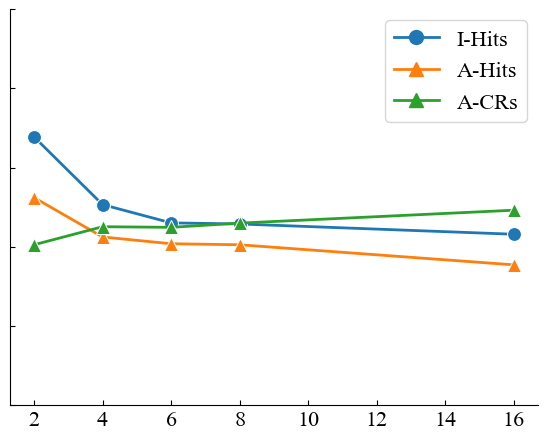

In [821]:
fig, ax = plt.subplots(figsize=(6,4.5))
fig.subplots_adjust(left=0.1, right=0.98, bottom=0.1, top=0.98)

ax.spines[['right', 'top']].set_visible(False)
ax.tick_params(axis="y",direction="in")
ax.tick_params(axis="x",direction="in")
sns.lineplot(data=df_laggp.loc[df_laggp.type == 'single_old'], x='lag', y='yes_rate', linewidth=2, marker='o', markersize = 10, label='I-Hits')
sns.lineplot(data=df_laggp.loc[df_laggp.type == 'pair_old'], x='lag', y='yes_rate', linewidth=2, marker='^', markersize = 10, label='A-Hits')
sns.lineplot(data=df_laggp.loc[df_laggp.type == 'pair_new'], x='lag', y='no_rate', linewidth=2, marker='^', markersize = 10, label='A-CRs')
plt.ylim([0.5,1])
plt.xlabel('Test Lag')
plt.ylabel('Proportion Correct')
ax.set(xlabel=None, ylabel=None)
plt.xticks(ticks=np.arange(2,18,2))
plt.tick_params(labelleft=False)
legend_elements = [Line2D([0], [0], color = sns.color_palette()[0], lw=2, marker='o', markersize = 10, linestyle='-',label = 'I-Hits'),
                   Line2D([0], [0], color = sns.color_palette()[1], lw=2, marker='^', markersize = 10, linestyle='-', label = 'A-Hits'),
                   Line2D([0], [0], color = sns.color_palette()[2], lw=2, marker='^', markersize = 10, linestyle='-', label = 'A-CRs')]
plt.legend(handles = legend_elements)

plt.savefig('simu3_fig/simu3_hr.pdf')
plt.show()

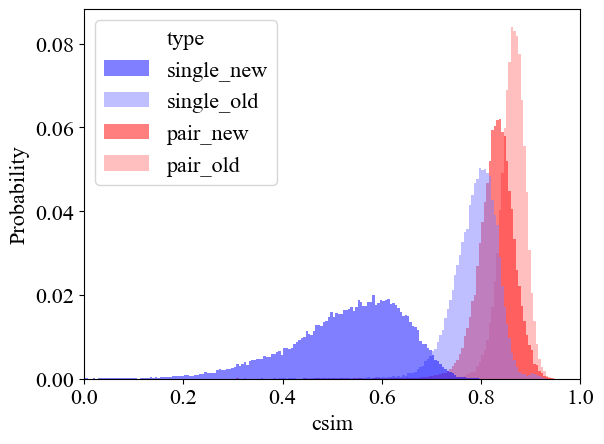

In [811]:
sns.histplot(data=df_simu, x="csim", hue = "type", hue_order = ['single_new', 'single_old', 'pair_new', 'pair_old'], palette = [[0,0,1],[0.5,0.5,1],[1,0,0],[1,0.5,0.5]], stat = "probability", binwidth = 0.005, common_norm=False, edgecolor = None, alpha=0.5)
# plt.savefig('fig/simu3_csim.pdf')
plt.xlim(0,1)
plt.show()

In [812]:
df_dprime = pd.DataFrame()
df_dprime['lag'] = [2,4,6,8,16]
df_dprime['I_z_hr'] = sp.stats.norm.ppf(df_laggp.loc[df_laggp.type == 'single_old', 'yes_rate_adj'].astype(float))
df_dprime['I_z_far'] = sp.stats.norm.ppf(np.mean(df_laggp.loc[df_laggp.type == 'single_new', 'yes_rate_adj'].astype(float)))
df_dprime['I_dprime'] = df_dprime['I_z_hr'] - df_dprime['I_z_far']
df_dprime['A_z_hr'] = sp.stats.norm.ppf(df_laggp.loc[df_laggp.type == 'pair_old', 'yes_rate_adj'].astype(float))
df_dprime['A_z_far'] = sp.stats.norm.ppf(df_laggp.loc[df_laggp.type == 'pair_new', 'yes_rate_adj'].astype(float))
df_dprime['A_dprime'] = df_dprime['A_z_hr'] - df_dprime['A_z_far']
df_dprime

,lag,I_z_hr,I_z_far,I_dprime,A_z_hr,A_z_far,A_dprime
0,2,0.819171,-1.483904,2.303075,0.602159,-0.454547,1.056706
1,4,0.581141,-1.483904,2.065046,0.478393,-0.506540,0.984933
2,6,0.522788,-1.483904,2.006692,0.455862,-0.503539,0.959401
3,8,0.517089,-1.483904,2.000993,0.453289,-0.516594,0.969883
4,16,0.483268,-1.483904,1.967173,0.391000,-0.557554,0.948554


In [813]:
# df_dprime = pd.DataFrame()
# df_dprime['lag'] = [2,4,6,8,16]
# df_dprime['I_z_hr'] = sp.stats.norm.ppf(df_laggp.loc[df_laggp.type == 'single_old', 'yes_rate'].astype(float))
# df_dprime['I_z_far'] = sp.stats.norm.ppf(np.mean(df_laggp.loc[df_laggp.type == 'single_new', 'yes_rate'].astype(float)))
# df_dprime['I_dprime'] = df_dprime['I_z_hr'] - df_dprime['I_z_far']
# df_dprime['A_z_hr'] = sp.stats.norm.ppf(df_laggp.loc[df_laggp.type == 'pair_old', 'yes_rate'].astype(float))
# df_dprime['A_z_far'] = sp.stats.norm.ppf(df_laggp.loc[df_laggp.type == 'pair_new', 'yes_rate'].astype(float))
# df_dprime['A_dprime'] = df_dprime['A_z_hr'] - df_dprime['A_z_far']
# df_dprime

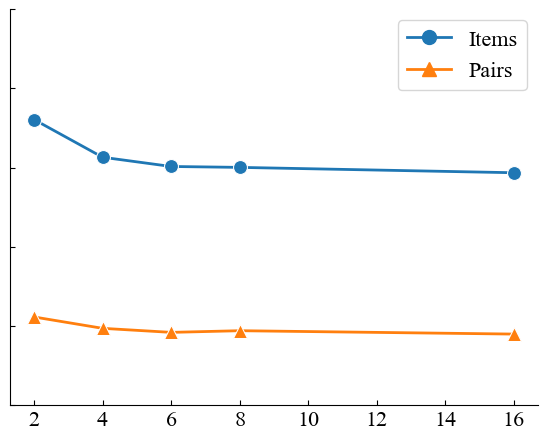

In [820]:
fig, ax = plt.subplots(figsize=(6,4.5))
fig.subplots_adjust(left=0.1, right=0.98, bottom=0.1, top=0.98)

ax.spines[['right', 'top']].set_visible(False)
ax.tick_params(axis="y",direction="in")
ax.tick_params(axis="x",direction="in")
sns.lineplot(data=df_dprime, x='lag', y='I_dprime', linewidth=2, marker='o', markersize = 10, label='Items')
sns.lineplot(data=df_dprime, x='lag', y='A_dprime', linewidth=2, marker='^', markersize = 10, label='Pairs')
# plt.ylabel("$d^'$")
# plt.xlabel('Test Lag')
ax.set(xlabel=None, ylabel=None)
plt.ylim([0.5,3])
plt.xticks(ticks=np.arange(2,18,2))
plt.tick_params(labelleft=False)
legend_elements = [Line2D([0], [0], color = sns.color_palette()[0], lw=2, marker='o', markersize = 10, linestyle='-',label = 'Items'),
                   Line2D([0], [0], color = sns.color_palette()[1], lw=2, marker='^', markersize = 10, linestyle='-', label = 'Pairs')]
plt.legend(handles = legend_elements)

plt.savefig('simu3_fig/simu3_dprime.pdf')
plt.show()

In [815]:
# get the vectors
I_hr = df_laggp.loc[df_laggp.type == 'single_old', "yes_rate"].to_numpy()
I_far = np.mean(df_laggp.loc[df_laggp.type == 'single_new', 'yes_rate'].astype(float))
A_hr = df_laggp.loc[df_laggp.type == 'pair_old', "yes_rate"].to_numpy()
A_far = df_laggp.loc[df_laggp.type == 'pair_new', "yes_rate"].to_numpy()
# I_dprime = df_dprime['I_dprime'].to_numpy()
# A_dprime = df_dprime['A_dprime'].to_numpy()

# ground truth
I_hr_gt = np.array([0.865, 0.811, 0.752, 0.746, 0.708])
I_far_gt = 0.15  # 0.12
A_hr_gt = np.array([0.843, 0.787, 0.720, 0.735, 0.646])
A_far_gt = np.array([0.406, 0.371, 0.285, 0.259, 0.202])
# I_dprime_gt = np.array([2.31, 2.05, 1.85, 1.84, 1.68])
# A_dprime_gt = np.array([1.36, 1.29, 1.37, 1.58, 1.39])

# calculate the error
pow_err = np.mean(np.power(I_hr - I_hr_gt, 2)) + np.mean(np.power(A_hr - A_hr_gt, 2)) \
    + np.power(I_far - I_far_gt, 2) * 5 + np.mean(np.power(A_far - A_far_gt, 2))
abs_err = np.mean(np.abs(I_hr - I_hr_gt)) + np.mean(np.abs(A_hr - A_hr_gt)) \
    + np.abs(I_far - I_far_gt) * 5 + np.mean(np.abs(A_far - A_far_gt))
err = pow_err + abs_err / 10
err

0.20638514272159725

In [816]:
I_hr, I_far, A_hr, A_far

(array([0.83873482, 0.7532179 , 0.73012779, 0.7287361 , 0.71577098]),
 0.0013203141097173194,
 array([0.76209188, 0.71234356, 0.70378391, 0.70247667, 0.67711799]),
 array([0.29751236, 0.27471942, 0.27550302, 0.27016353, 0.25386369]))